In [479]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

In [480]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [481]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [482]:
df.duplicated().sum()

0

In [483]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<ipython-input-484-7805a78de9c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, cmap='plasma')


<Axes: >

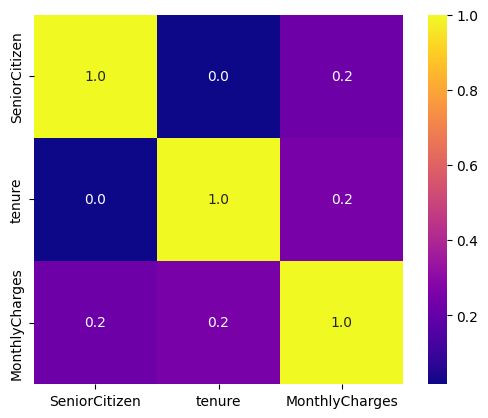

In [484]:
sns.heatmap(df.corr(), cbar=True, square=True, fmt='.1f', annot=True, cmap='plasma')

In [485]:
for column in df.columns:
    unique_values = df[column].unique()
    if unique_values.size > 0:
        print(column, "has", unique_values.size, "unique values", unique_values)
    else:
        print(column, "doesn't have any unique values")

customerID has 7043 unique values ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender has 2 unique values ['Female' 'Male']
SeniorCitizen has 2 unique values [0 1]
Partner has 2 unique values ['Yes' 'No']
Dependents has 2 unique values ['No' 'Yes']
tenure has 73 unique values [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService has 2 unique values ['No' 'Yes']
MultipleLines has 3 unique values ['No phone service' 'No' 'Yes']
InternetService has 3 unique values ['DSL' 'Fiber optic' 'No']
OnlineSecurity has 3 unique values ['No' 'Yes' 'No internet service']
OnlineBackup has 3 unique values ['Yes' 'No' 'No internet service']
DeviceProtection has 3 unique values ['No' 'Yes' 'No internet service']
TechSupport has 3 unique values ['No' 'Yes' 'No internet service']
Streami

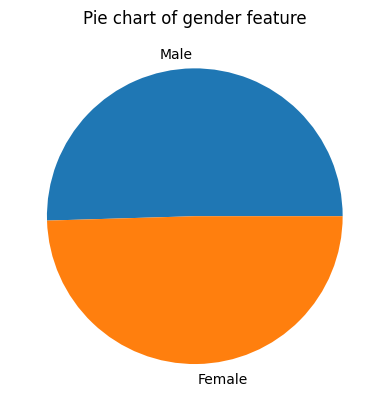

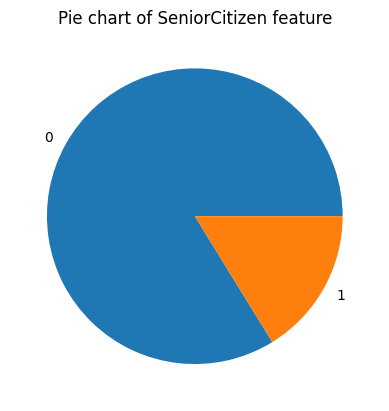

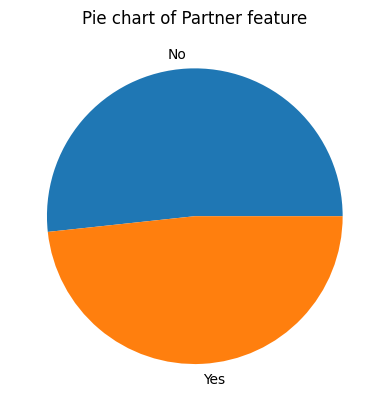

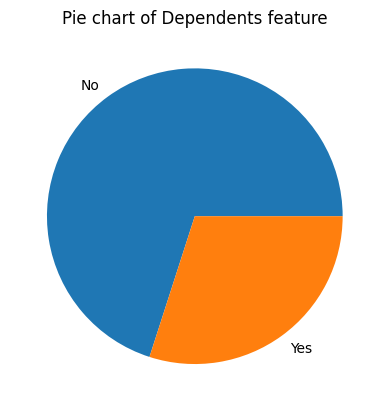

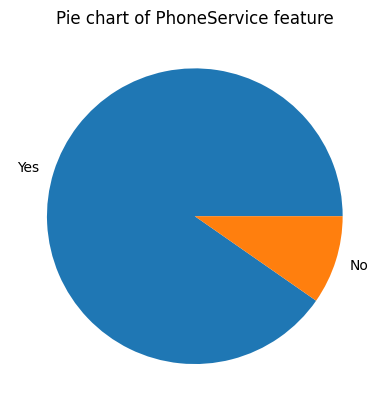

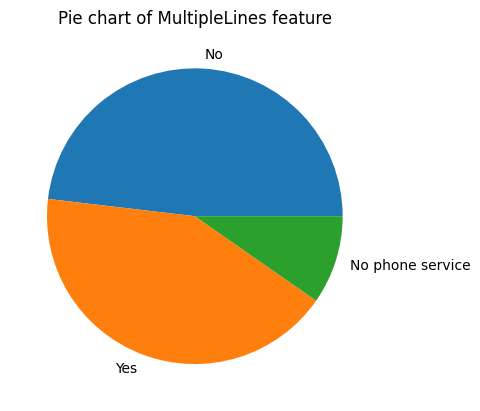

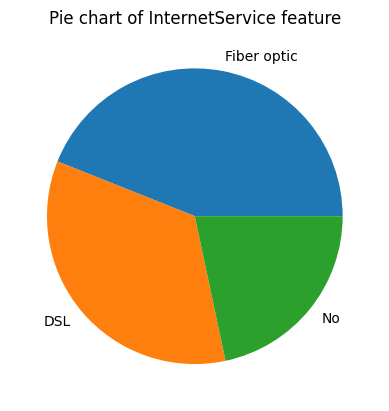

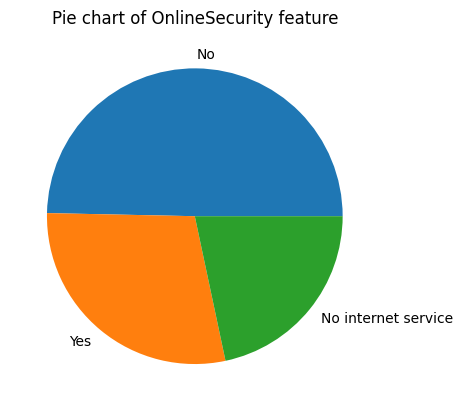

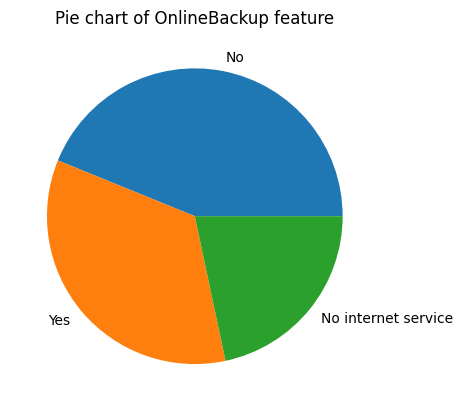

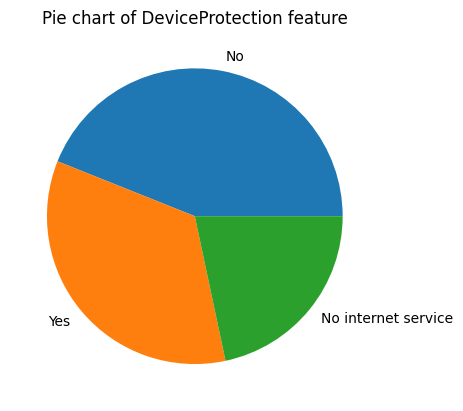

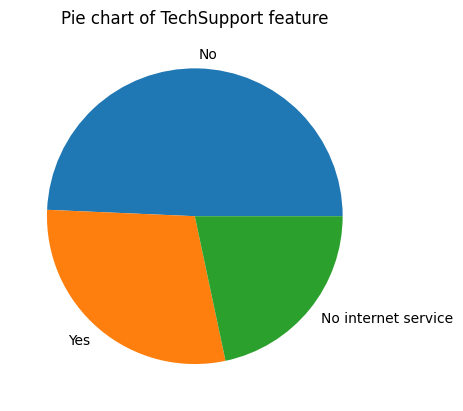

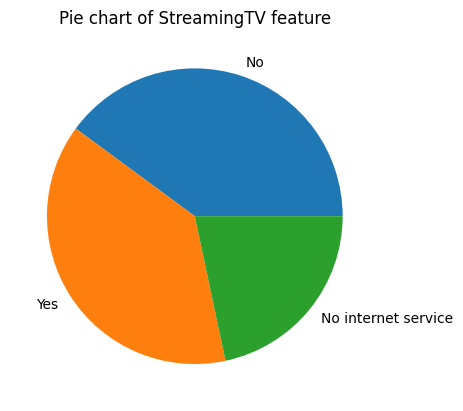

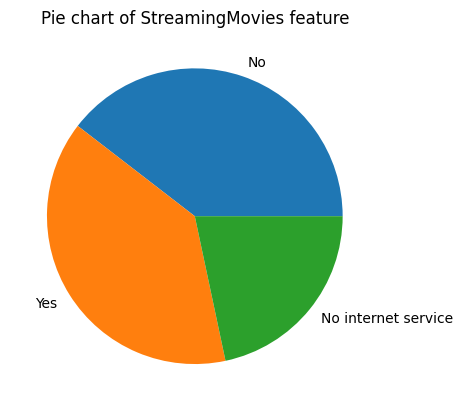

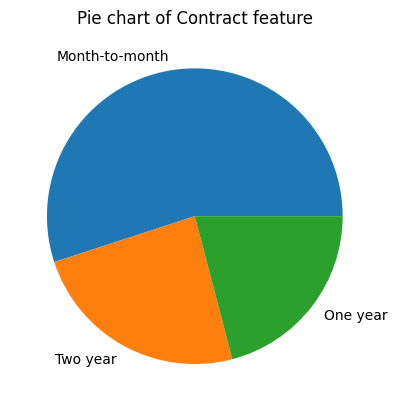

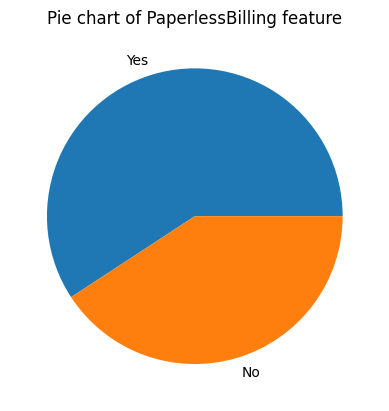

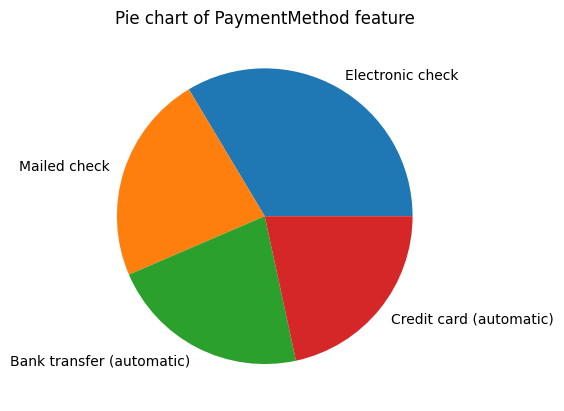

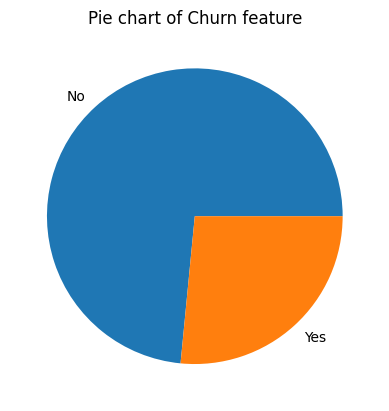

In [486]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 4:
        counts = df[column].value_counts()
        # Create a pie chart with the counts
        plt.pie(counts, labels=counts.index)
        plt.title(f"Pie chart of {column} feature")
        # Show the pie chart
        plt.show()

gender


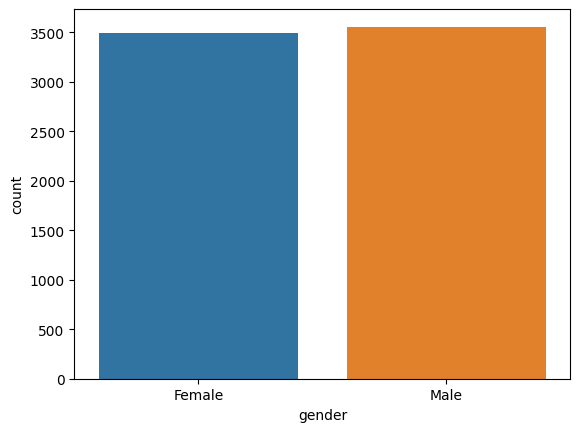

SeniorCitizen


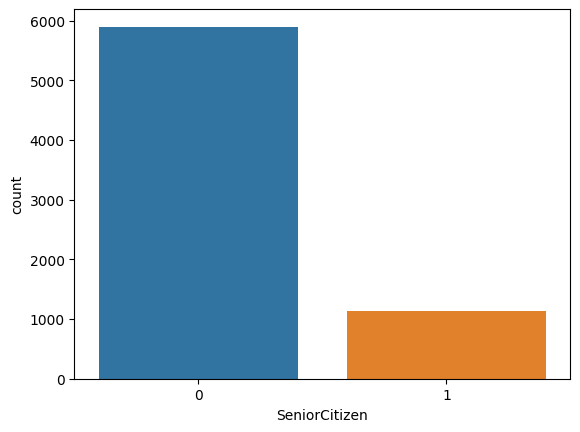

Partner


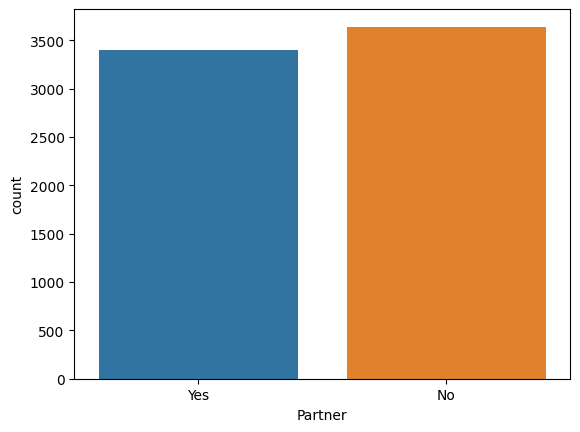

Dependents


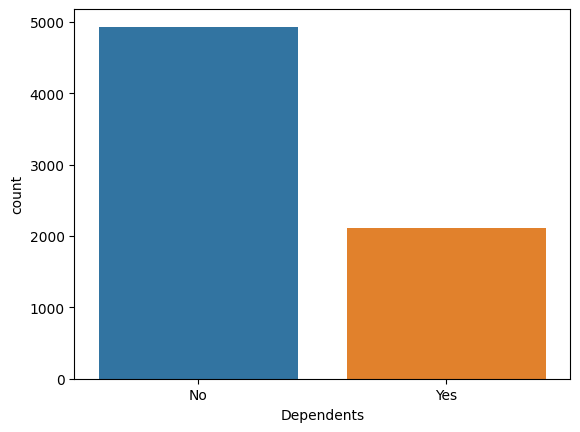

PhoneService


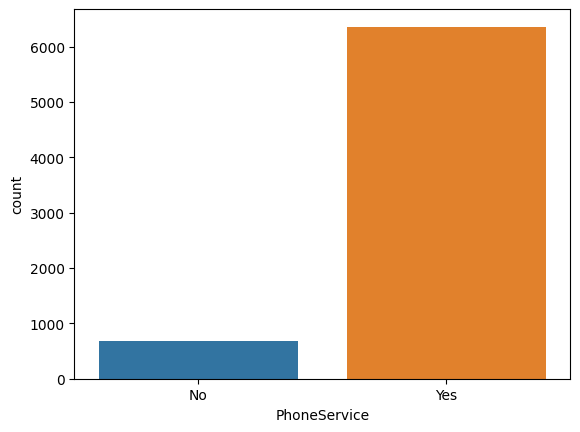

MultipleLines


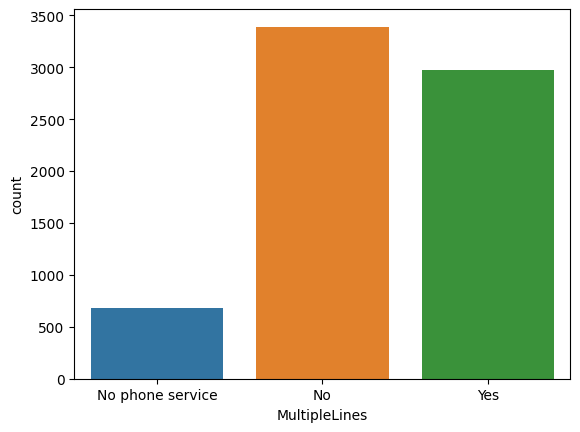

InternetService


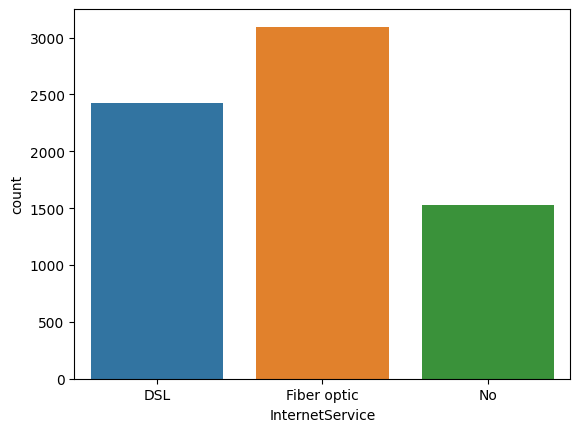

OnlineSecurity


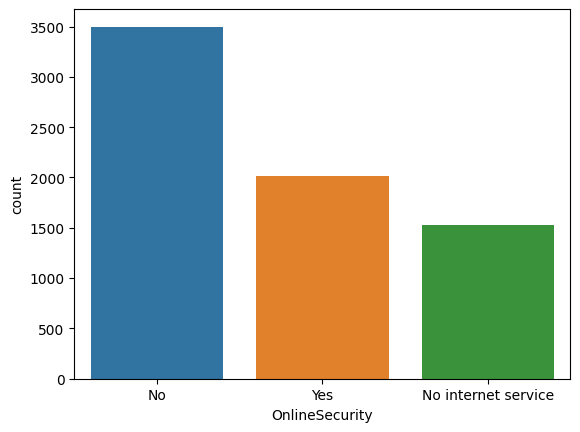

OnlineBackup


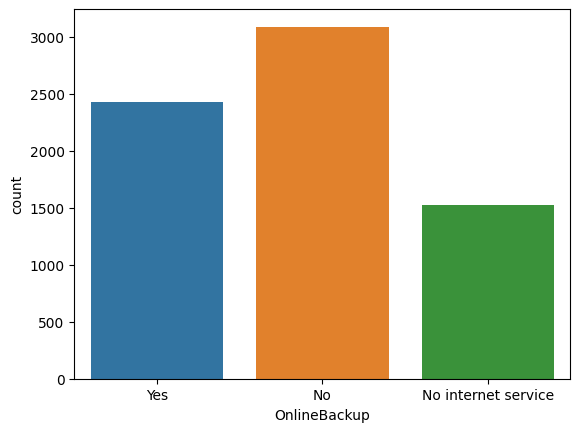

DeviceProtection


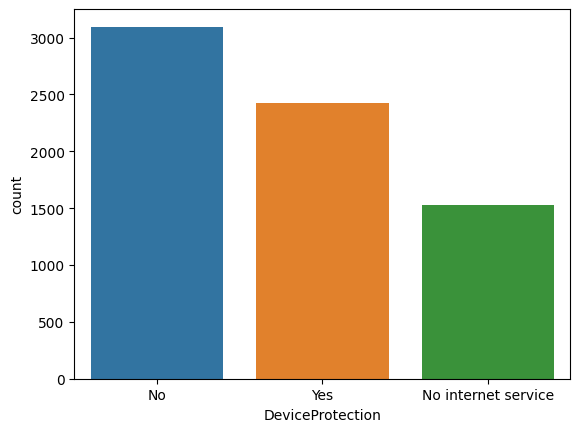

TechSupport


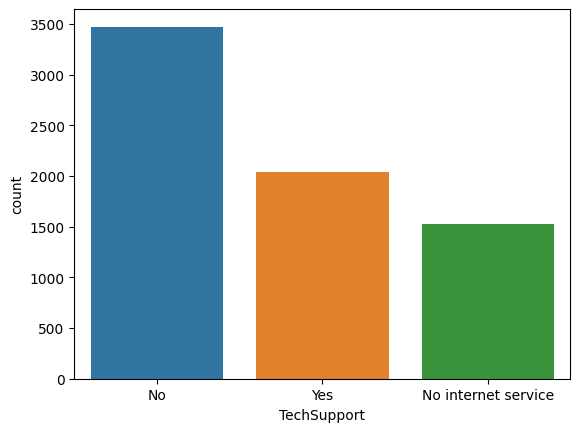

StreamingTV


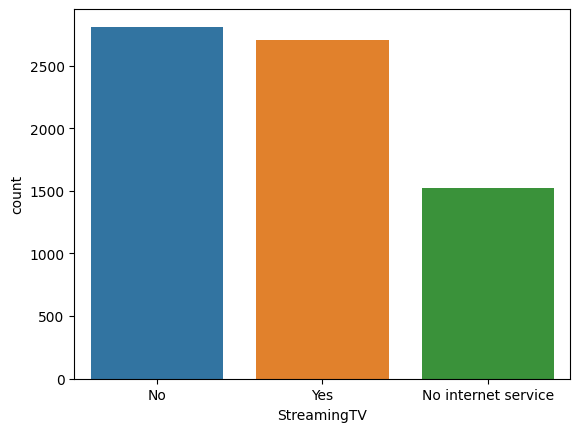

StreamingMovies


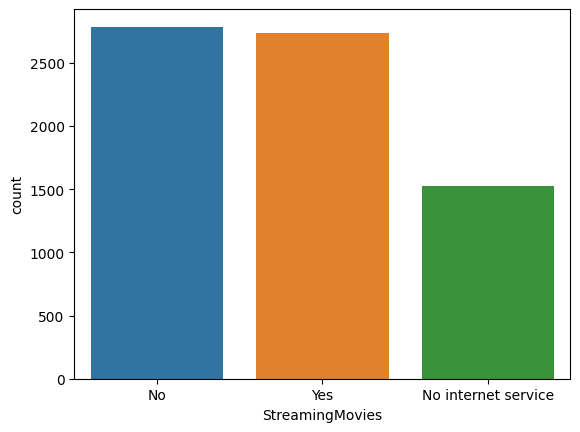

Contract


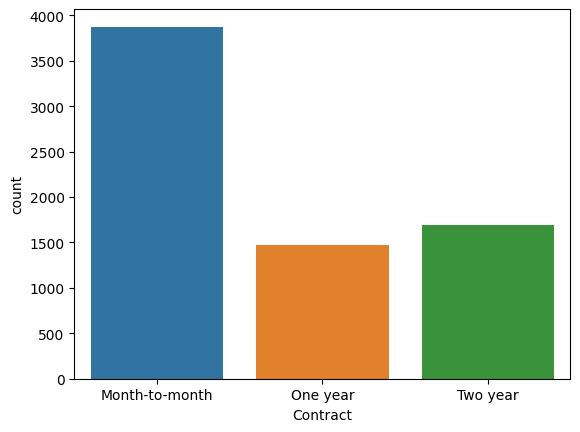

PaperlessBilling


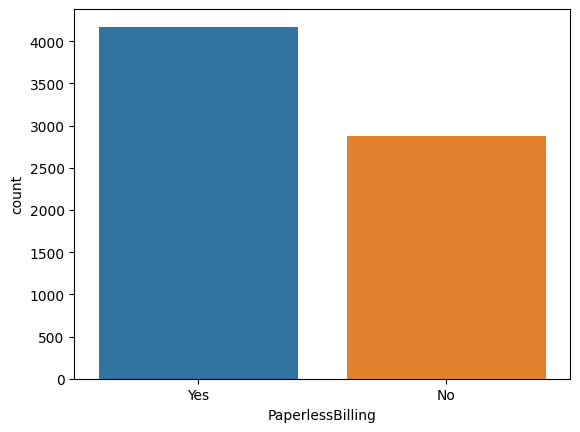

PaymentMethod


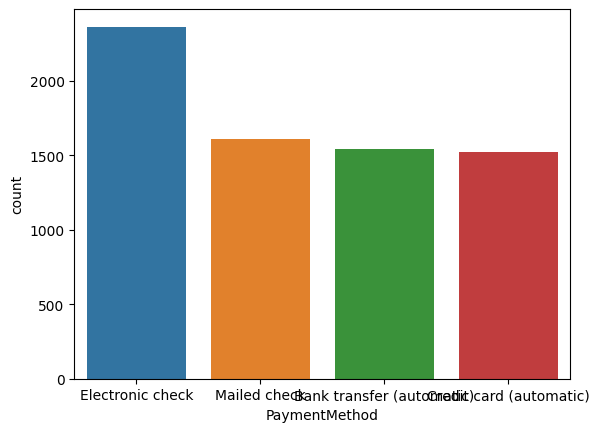

Churn


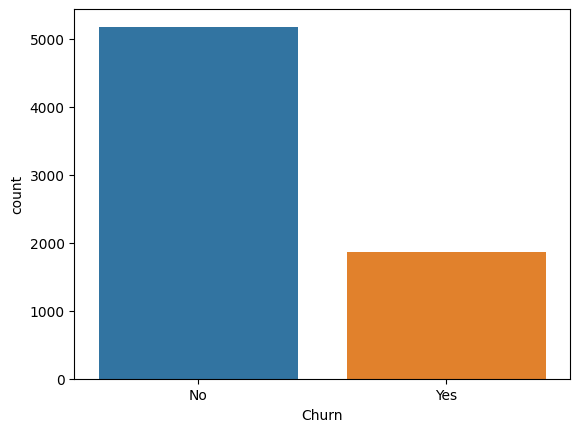

In [487]:
for column in df.columns:
    unique_values = df[column].unique()
    if 0 < unique_values.size <= 4:
        print(column)


        sns.countplot(data=df,x=column)
        plt.show()

In [488]:
for column in df.columns:
    unique_values = df[column].unique()
    if unique_values.size <=4:
        print(column, "has", unique_values.size, "unique values", unique_values)
    else:
        print(column, "doesn't have any unique values")

customerID doesn't have any unique values
gender has 2 unique values ['Female' 'Male']
SeniorCitizen has 2 unique values [0 1]
Partner has 2 unique values ['Yes' 'No']
Dependents has 2 unique values ['No' 'Yes']
tenure doesn't have any unique values
PhoneService has 2 unique values ['No' 'Yes']
MultipleLines has 3 unique values ['No phone service' 'No' 'Yes']
InternetService has 3 unique values ['DSL' 'Fiber optic' 'No']
OnlineSecurity has 3 unique values ['No' 'Yes' 'No internet service']
OnlineBackup has 3 unique values ['Yes' 'No' 'No internet service']
DeviceProtection has 3 unique values ['No' 'Yes' 'No internet service']
TechSupport has 3 unique values ['No' 'Yes' 'No internet service']
StreamingTV has 3 unique values ['No' 'Yes' 'No internet service']
StreamingMovies has 3 unique values ['No' 'Yes' 'No internet service']
Contract has 3 unique values ['Month-to-month' 'One year' 'Two year']
PaperlessBilling has 2 unique values ['Yes' 'No']
PaymentMethod has 4 unique values ['Elec

In [489]:
selected_columns = []

for column in df.columns:
    unique_values = df[column].unique()
    if unique_values.size <= 4:
       selected_columns.append(column)

selected_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [490]:
for column in selected_columns:
  print(df.groupby(column).Churn.value_counts())
  print("***"*10)

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64
******************************
SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64
******************************
Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64
******************************
Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64
******************************
PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64
******************************
MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No       

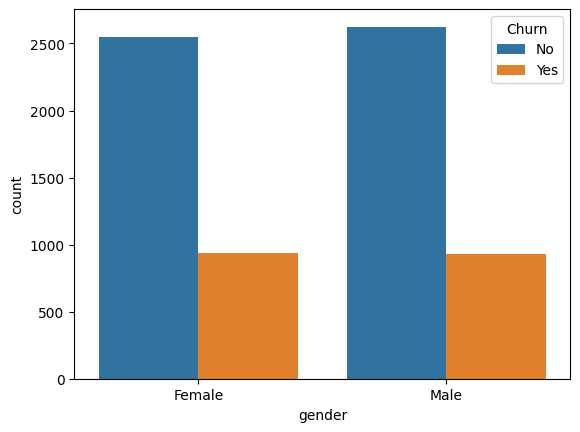

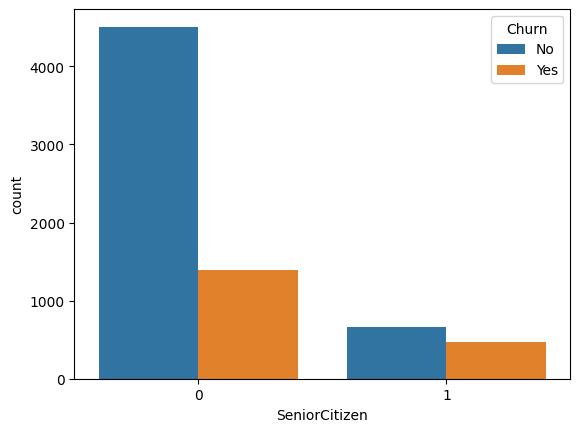

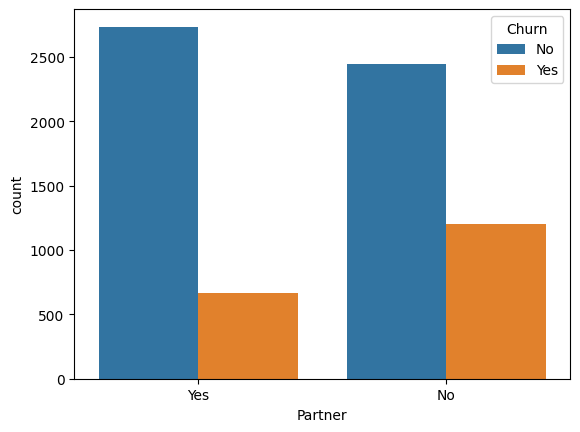

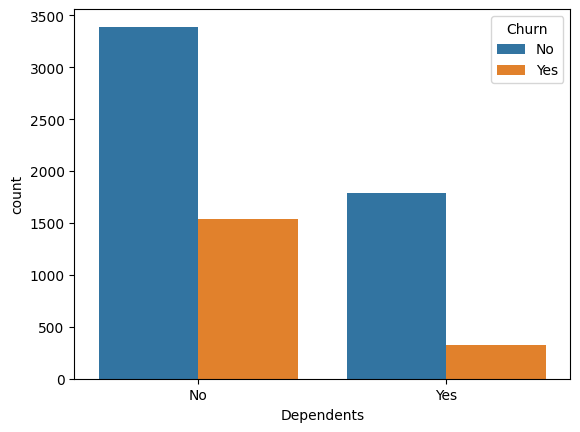

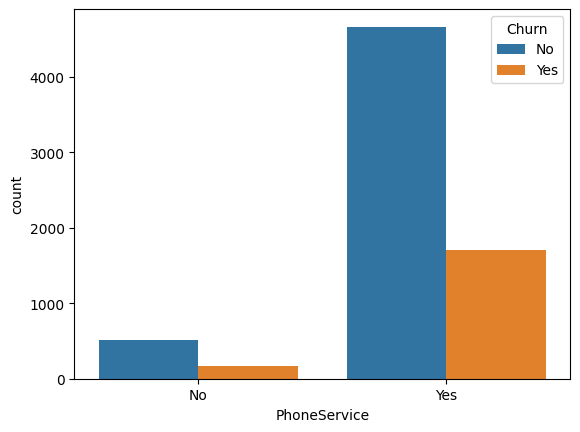

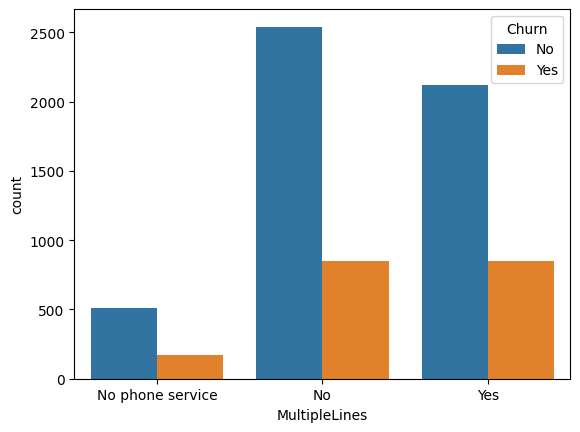

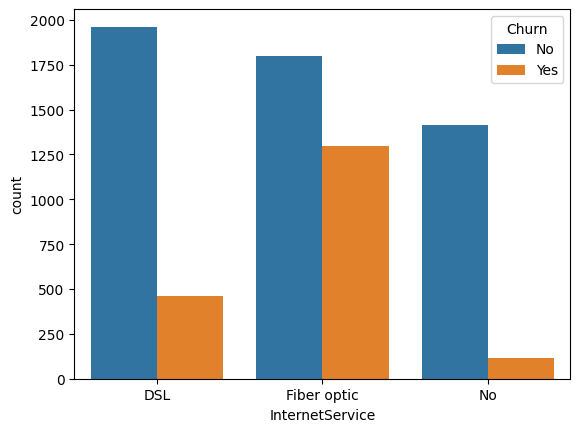

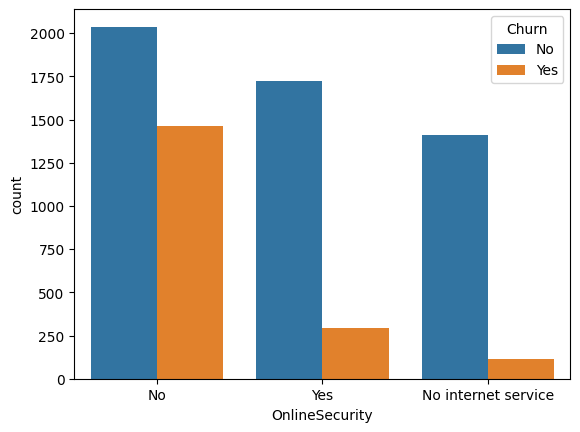

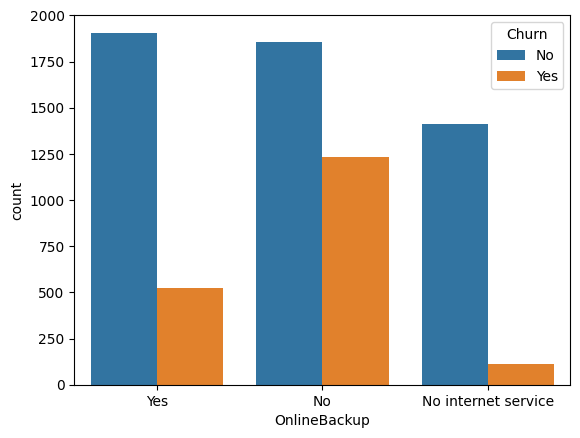

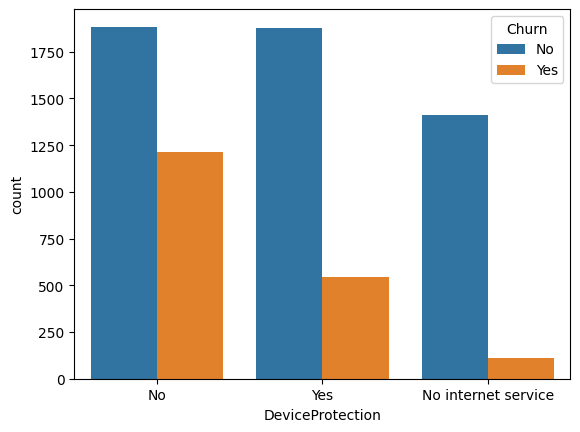

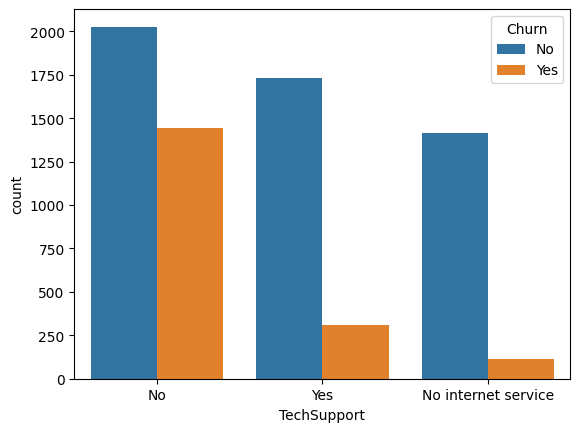

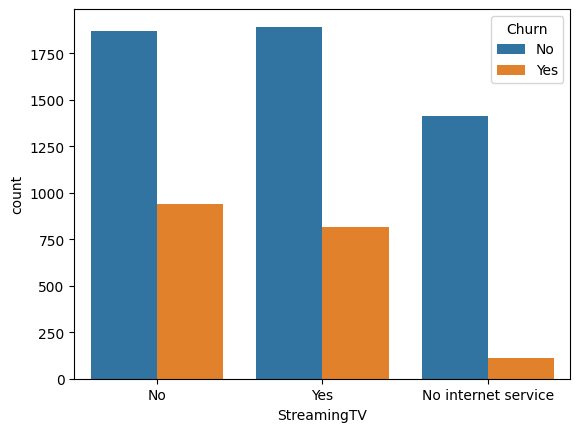

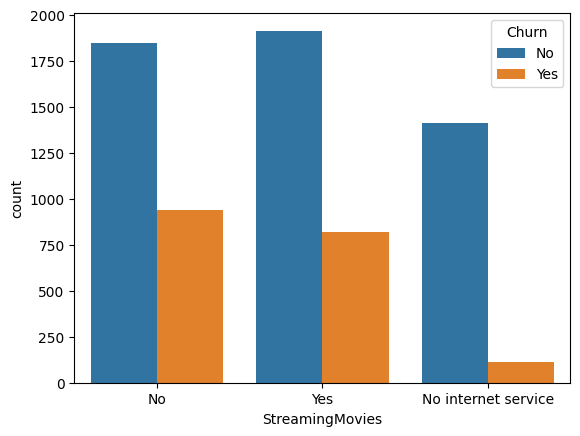

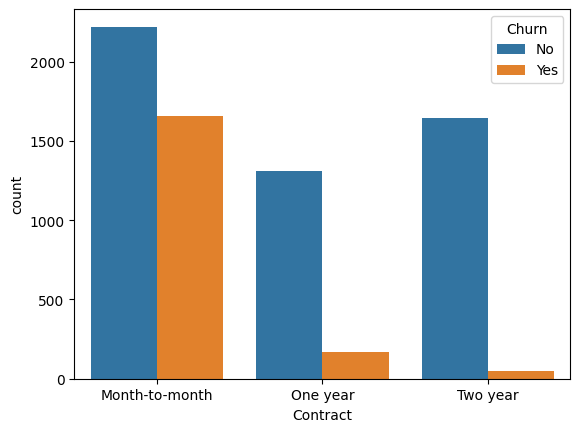

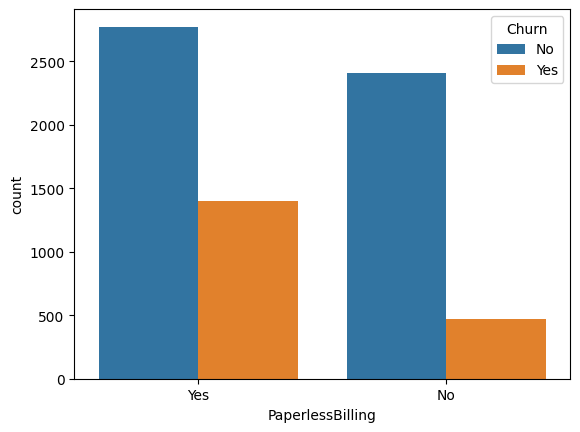

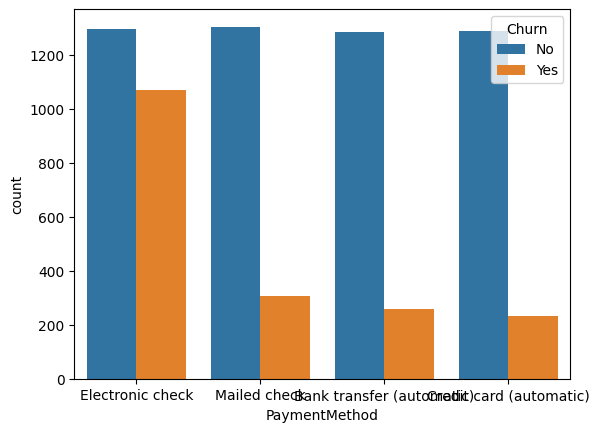

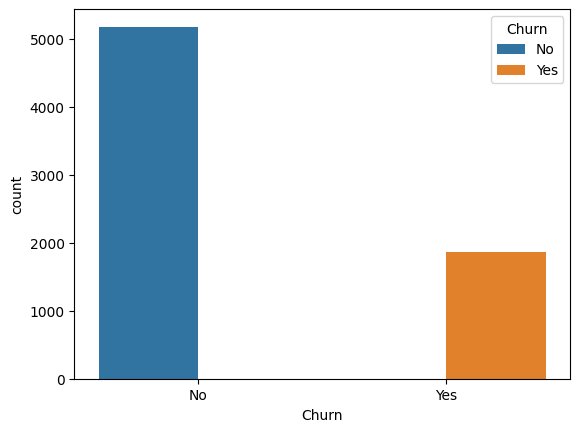

In [491]:
for column in selected_columns:
   sns.countplot(data=df, x=column ,hue='Churn')
   plt.show()

In [492]:
def outlier_thresholds(dataframe, col_name, q1=.05, q3=.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [493]:
def check_outlier(dataframe, col_name, q1=.05, q3=.95):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [494]:
num_cols=[col for col in df.columns if (df[col].dtypes in ["int64", "float64"]) & (df[col].nunique() > 10)]
num_cols

['tenure', 'MonthlyCharges']

In [495]:
for col in num_cols:
    print(col , check_outlier(df,col))

tenure False
MonthlyCharges False


<ipython-input-496-1304f67c3c56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.2, cmap='Reds', square=True)


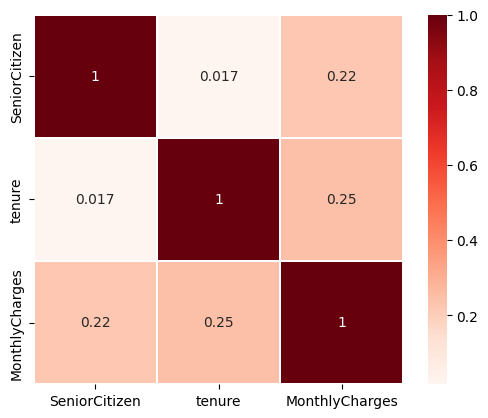

In [496]:
sns.heatmap(df.corr(), annot=True, linewidths=.2, cmap='Reds', square=True)
plt.show(block=True)


In [497]:
# Convert "TotalCharges" column to numeric type
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Categorize based on "TotalCharges" values
df.loc[df["TotalCharges"] < 35, "TOTAL_CHARGES_CAT"] = "low total"
df.loc[(df["TotalCharges"] >= 35) & (df["TotalCharges"] < 70), "TOTAL_CHARGES_CAT"] = "medium total"
df.loc[(df["TotalCharges"] >= 70) & (df["TotalCharges"] < 89), "TOTAL_CHARGES_CAT"] = "high total"
df.loc[df["TotalCharges"] >= 89, "TOTAL_CHARGES_CAT"] = "very high total"
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TOTAL_CHARGES_CAT
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,low total
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,very high total
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,very high total
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,very high total
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,very high total
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,very high total
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,very high total
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,very high total
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,very high total
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,very high total


In [498]:
def binary_cols(dataframe):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtype not in ['int64', 'float64'] and dataframe[col].nunique() <= 2]
    return binary_cols

binary_cols(df)

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [499]:
ordinal_cols=binary_cols(df) + ["PaymentMethod", "Contract", "InternetService", "TOTAL_CHARGES_CAT"]
ordinal_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn',
 'PaymentMethod',
 'Contract',
 'InternetService',
 'TOTAL_CHARGES_CAT']

In [500]:
def label_encoder(dataframe, col):
    labelencoder = LabelEncoder()
    dataframe[col] = labelencoder.fit_transform(dataframe[col])
    return dataframe

for col in  ordinal_cols:
    label_encoder(df,col)

In [501]:
cat_cols=[col for col in df.columns if  df[col].nunique()<=10]
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'TOTAL_CHARGES_CAT']

In [502]:
ohe_cols= [col for col in cat_cols if (col not in ordinal_cols) & (col != "Churn") ]
ohe_cols

['SeniorCitizen',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [503]:
df=pd.get_dummies(df,columns=ohe_cols,drop_first=True)
df

,customerID,gender,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,0,0,1,2,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,34,1,0,1,0,3,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,1,0,0,2,1,0,0,1,3,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,45,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,2,1,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,1,24,1,0,1,1,3,...,0,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,0,1,1,72,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,4801-JZAZL,0,1,1,11,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
7041,8361-LTMKD,1,1,0,4,1,1,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [504]:
num_cols

['tenure', 'MonthlyCharges']

In [505]:
ss = StandardScaler()
df[num_cols] =ss.fit_transform(df[num_cols])

In [506]:
df.head()

,customerID,gender,Partner,Dependents,tenure,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,-1.277445,0,0,0,1,2,...,0,1,0,0,0,0,0,0,0,0
1,5575-GNVDE,1,0,0,0.066327,1,0,1,0,3,...,0,0,0,1,0,0,0,0,0,0
2,3668-QPYBK,1,0,0,-1.236724,1,0,0,1,3,...,0,1,0,0,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0.514251,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,9237-HQITU,0,0,0,-1.236724,1,1,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [508]:
X=df.drop(["customerID", "Churn"], axis=1)
y=df["Churn"]

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Select the desired imputation strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [510]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

RandomForestClassifier()

In [511]:
# Make predictions on the testing set
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [514]:
rf_model.feature_importances_

array([0.02793137, 0.02329581, 0.01894809, 0.15646648, 0.00416088,
       0.03381294, 0.06910937, 0.02654746, 0.05182961, 0.17339352,
       0.19375459, 0.01368967, 0.02080843, 0.0036949 , 0.01924109,
       0.00603541, 0.02936959, 0.00826807, 0.02113612, 0.00831552,
       0.01793733, 0.00381824, 0.02361915, 0.00543056, 0.01631536,
       0.00597456, 0.01709588])

In [515]:
fi=pd.DataFrame({'importance':rf_model.feature_importances_},index=X.columns)
fi.sort_values('importance',ascending=False)

,importance
TotalCharges,0.193755
MonthlyCharges,0.173394
tenure,0.156466
Contract,0.069109
PaymentMethod,0.051830
InternetService,0.033813
OnlineSecurity_Yes,0.029370
gender,0.027931
PaperlessBilling,0.026547
TechSupport_Yes,0.023619


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['importance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['importance'], **{})
chart

Text(0.5, 1.0, 'Feature Importance')

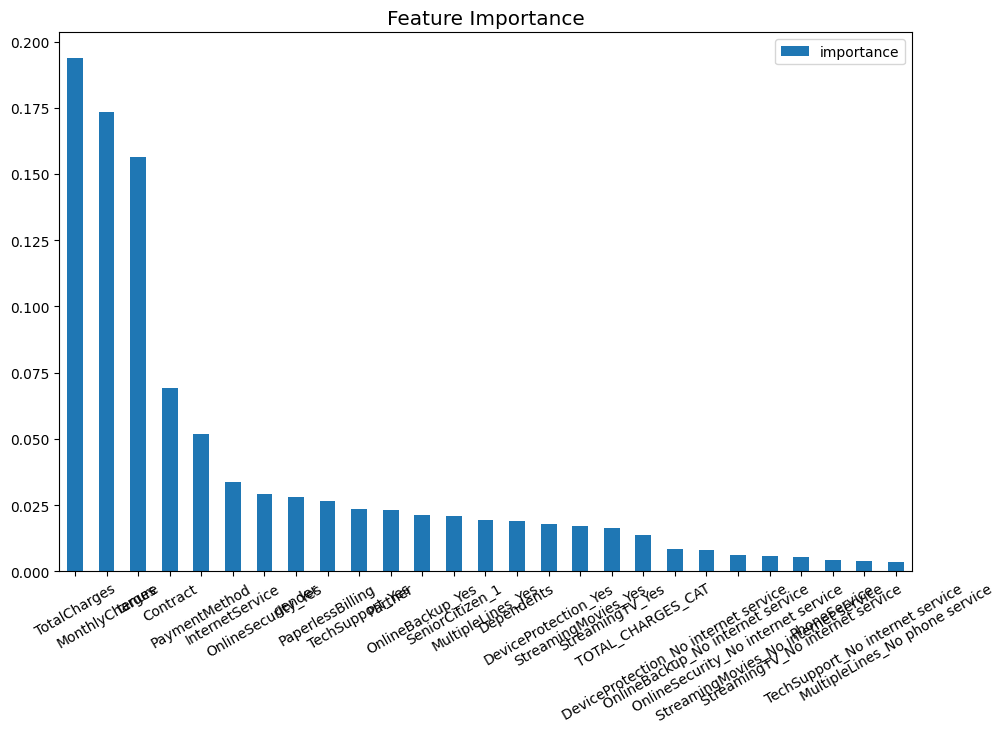

In [516]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

In [517]:
accuracy_score(y_test, y_pred)

0.7821149751596878